<a href="https://colab.research.google.com/github/THREELabs/THREELabs-Crypto-Forecasting/blob/main/THREELabs_Crypto_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor

In [4]:
#upload csv
data = pd.read_csv("DOGE-USD.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-12-10,0.098543,0.102636,0.097152,0.101801,0.101801,687190079
1,2023-12-11,0.101812,0.105837,0.091815,0.094384,0.094384,1973481451
2,2023-12-12,0.094382,0.097453,0.091542,0.093835,0.093835,948285886
3,2023-12-13,0.093820,0.097382,0.090605,0.096428,0.096428,812811810
4,2023-12-14,0.096427,0.098679,0.094975,0.098255,0.098255,742258598


In [12]:
#check correlation
data.corr(numeric_only=True)

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.985224,0.972956,0.968134,0.968134,0.859584
High,0.985224,1.000000,0.962702,0.981677,0.981677,0.913703
Low,0.972956,0.962702,1.000000,0.983104,0.983104,0.781681
Close,0.968134,0.981677,0.983104,1.000000,1.000000,0.848153
Adj Close,0.968134,0.981677,0.983104,1.000000,1.000000,0.848153
Volume,0.859584,0.913703,0.781681,0.848153,0.848153,1.000000


In [14]:
#convert string date/time into proper format. Check for null values
data['Date'] = pd.to_datetime(data['Date'],
                              infer_datetime_format=True)
data.set_index('Date', inplace=True)

data.isnull().any()

Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

In [15]:
#statistical analysis
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,92.000000,92.000000,92.000000,92.000000,92.000000,9.200000e+01
mean,0.093528,0.097542,0.090500,0.094338,0.094338,1.016844e+09
std,0.023419,0.028138,0.020604,0.024839,0.024839,1.504685e+09
min,0.077929,0.078705,0.074972,0.077933,0.077933,1.529078e+08
25%,0.080468,0.082087,0.078893,0.080464,0.080464,3.129861e+08
50%,0.085323,0.087319,0.083100,0.085315,0.085315,4.824584e+08
75%,0.093583,0.095274,0.091355,0.093566,0.093566,7.131530e+08
max,0.182804,0.205439,0.168752,0.182910,0.182910,9.368269e+09


Text(0.5, 1.0, 'Date vs Close of 2021')

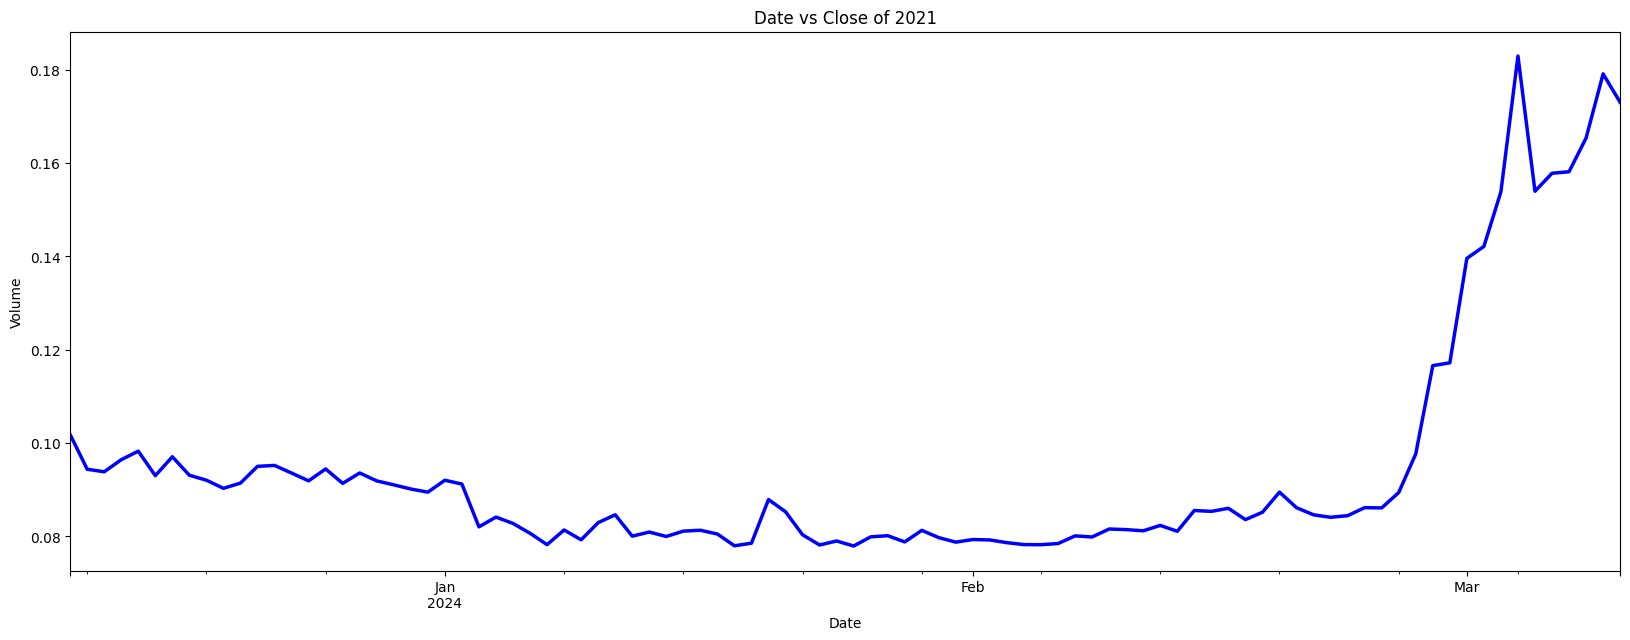

In [16]:
#analyze the closing price as we need to perform the prediction
plt.figure(figsize=(20, 7))
x = data.groupby('Date')['Close'].mean()
x.plot(linewidth=2.5, color='b')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title("Date vs Close of 2021")

In [18]:
#The column ‘Close’ is our predicted feature. We are taking different factors from the predefined factors for our own calculation and naming them suitably. Also, we are checking each factor while correlating with the ‘Close’ column while sorting it in descending order.
data["gap"] = (data["High"] - data["Low"]) * data["Volume"]
data["y"] = data["High"] / data["Volume"]
data["z"] = data["Low"] / data["Volume"]
data["a"] = data["High"] / data["Low"]
data["b"] = (data["High"] / data["Low"]) * data["Volume"]
abs(data.corr()["Close"].sort_values(ascending=False))

Close        1.000000
Adj Close    1.000000
Low          0.983104
High         0.981677
Open         0.968134
Volume       0.848153
b            0.783710
a            0.626965
gap          0.574236
z            0.598866
y            0.604897
Name: Close, dtype: float64

In [19]:
#By, observing the correlating factors, we can choose a few of them. We are excluding High, Low, and Open as they are highly correlated from the beginning.
data = data[["Close", "Volume", "gap", "a", "b"]]
data.head()

,Close,Volume,gap,a,b
Date,,,,,
2023-12-10,0.101801,687190079,3.768550e+06,1.056448,7.259803e+08
2023-12-11,0.094384,1973481451,2.767216e+07,1.152720,2.274872e+09
2023-12-12,0.093835,948285886,5.605318e+06,1.064571,1.009518e+09
2023-12-13,0.096428,812811810,5.508426e+06,1.074797,8.736079e+08
2023-12-14,0.098255,742258598,2.749326e+06,1.039000,7.712065e+08


In [21]:
#Introducing the ARIMA model for Time Series Analysis. ARIMA stands for autoregressive integrated moving average model and is specified by three order parameters: (p, d, q) where AR stands for Autoregression i.e. p, I stands for Integration i.e. d, MA stands for Moving Average i.e. q. Whereas, SARIMAX is Seasonal ARIMA with exogenous variables.
df2 = data.tail(30)
train = df2[:11]
test = df2[-19:]

print(train.shape, test.shape)

(11, 5) (19, 5)


In [23]:
#implement SARIMAX Model
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(endog=train["Close"], exog=train.drop(
    "Close", axis=1), order=(2, 1, 1))
results = model.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                   11
Model:               SARIMAX(2, 1, 1)   Log Likelihood                  47.891
Date:                Sun, 10 Mar 2024   AIC                            -79.781
Time:                        20:21:57   BIC                            -77.360
Sample:                    02-10-2024   HQIC                           -82.437
                         - 02-20-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Volume      1.597e-09   1.74e-09      0.919      0.358   -1.81e-09    5.01e-09
gap          1.66e-08    2.2e-08      0.753      0.452   -2.66e-08    5.98e-08
a              0.1978   6.07e-12   3.26e+10      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimiz

In [24]:
#prediction in time series
start = 11
end = 29
predictions = results.predict(
    start=start,
    end=end,
    exog=test.drop("Close", axis=1))
predictions

2024-02-21    0.084636
2024-02-22    0.082389
2024-02-23    0.082760
2024-02-24    0.082558
2024-02-25    0.080732
2024-02-26    0.087162
2024-02-27    0.089553
2024-02-28    0.144238
2024-02-29    0.415982
2024-03-01    0.476230
2024-03-02    0.361136
2024-03-03    0.603327
2024-03-04    1.512267
2024-03-05    3.365484
2024-03-06    0.948415
2024-03-07    0.382418
2024-03-08    0.642854
2024-03-09    0.613435
2024-03-10    0.327187
Freq: D, Name: predicted_mean, dtype: float64